In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs, make_moons

In [134]:
X, y = make_moons(n_samples=400, noise=0.1)
df = pd.DataFrame(X, columns=[0,1])
df['target'] = y

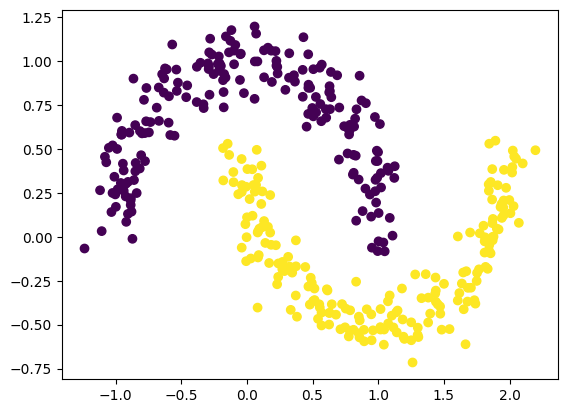

In [4]:
plt.scatter(x=df[0], y=df[1], c=df['target'])

In [5]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
def evaluation(model, X, y):
    score = np.mean(cross_val_score(model, X, y, cv=10, scoring='accuracy'))
    return {
        "accuracy" : score
    }

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [113]:
# using normal logistic reg
from sklearn.linear_model import LogisticRegression

In [8]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model1.predict(X_test)
evaluation(model1, X, y)

{'accuracy': 0.8825}

<Axes: >

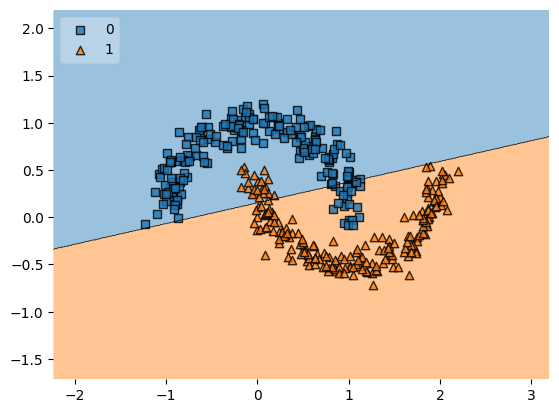

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model1, legend=2)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([
    ("poly features", PolynomialFeatures(degree=3)),
    ("model training", LogisticRegression())
])

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly features', PolynomialFeatures(degree=3)),
                ('model training', LogisticRegression())])

In [13]:
y_pred_ = pipe.predict(X_test)
evaluation(pipe, X, y)

{'accuracy': 0.9824999999999999}

<Axes: >

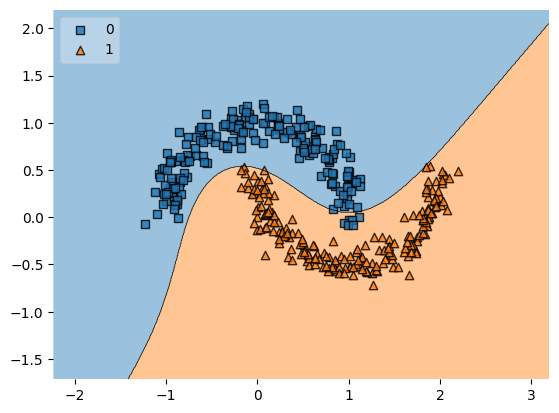

In [14]:
plot_decision_regions(X, y, pipe, legend=2)

In [78]:
def plot_border(X, y, n_degree:int=1, model=LogisticRegression(penalty='l2')):
    pipe = Pipeline([
        ("poly features", PolynomialFeatures(degree=n_degree, include_bias=False)),
        ("model training", model),
    ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    pipe.fit(X_train, y_train)

    y_pred_ = pipe.predict(X_test)
    print(evaluation(pipe, X, y))
    
    plot_decision_regions(X, y, pipe, legend=2)

    return {
        "model": pipe
    }
    

{'accuracy': 0.8825}


{'model': Pipeline(steps=[('poly features',
                  PolynomialFeatures(degree=1, include_bias=False)),
                 ('model training', LogisticRegression())])}

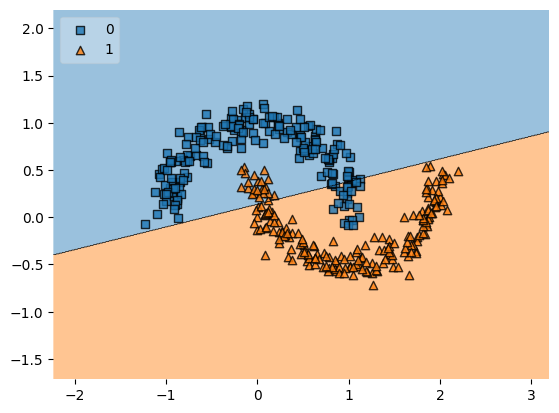

In [79]:
plot_border(X, y)

{'accuracy': 0.875}


{'model': Pipeline(steps=[('poly features', PolynomialFeatures(include_bias=False)),
                 ('model training', LogisticRegression())])}

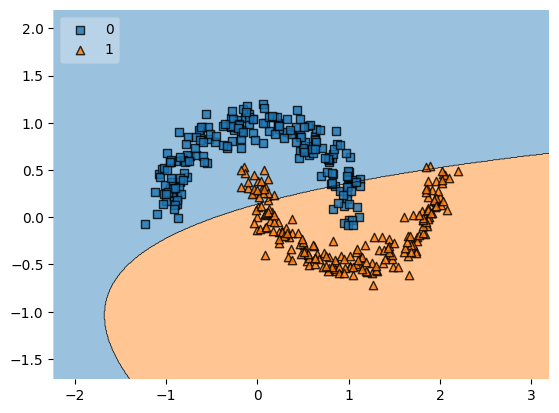

In [84]:
plot_border(X, y, 2)

{'accuracy': 0.9824999999999999}


{'model': Pipeline(steps=[('poly features',
                  PolynomialFeatures(degree=3, include_bias=False)),
                 ('model training', LogisticRegression())])}

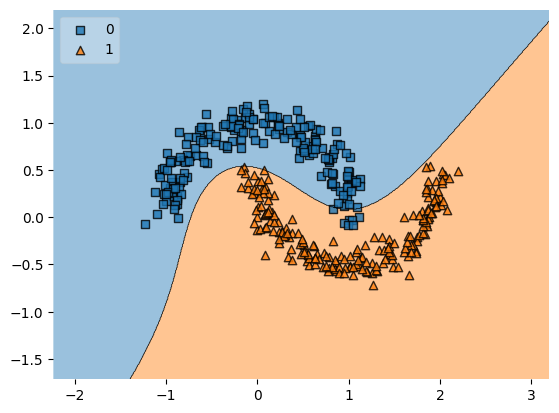

In [18]:
plot_border(X, y, 3) # best model -> as of now

{'accuracy': 0.9774999999999998}


{'model': Pipeline(steps=[('poly features', PolynomialFeatures(include_bias=False)),
                 ('model training', DecisionTreeClassifier(max_depth=5))])}

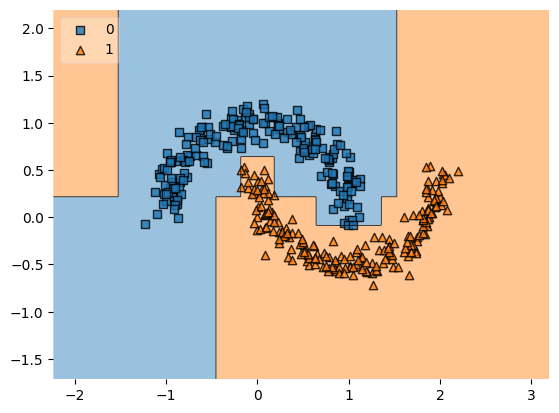

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, splitter='best')
plot_border(X,y, 2, model=dt)

## Voting Ensemble implementation

{'accuracy': 0.9824999999999999}


Pipeline(steps=[('poly features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model training', LogisticRegression())])

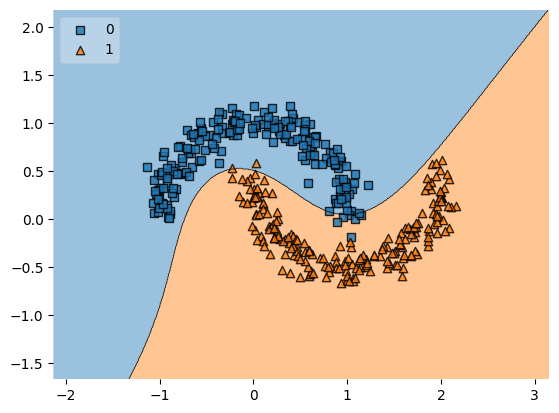

In [177]:
lr_pipe = plot_border(X=X, y=y, n_degree=3)
lr_pipe['model']

In [178]:
from sklearn.ensemble import VotingClassifier
models = [
    ("lor", lr_pipe['model']),
    ("dt_best", DecisionTreeClassifier(max_depth=5, splitter='best'))
]

In [179]:
for model in models:
    model[1].fit(X_train, y_train)
    y_pred = model[1].predict(X_test)
    # print(f"{model[0]} : ", np.mean(cross_val_score(model[1], X, y, cv=10, scoring='accuracy')))
    print(f"{model[0]} : {accuracy_score(y_test, y_pred)}")

lor : 0.95
dt_best : 0.9625


In [180]:
voting = VotingClassifier(estimators=models, voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lor',
                              Pipeline(steps=[('poly features',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('model training',
                                               LogisticRegression())])),
                             ('dt_best', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [181]:
np.mean(cross_val_score(voting, X, y, cv=10, scoring='accuracy'))

0.975

In [182]:
y_pred = voting.predict(X_test)

In [183]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.952381,0.973684,0.9625,0.963033,0.962766
recall,0.975610,0.948718,0.9625,0.962164,0.962500
f1-score,0.963855,0.961039,0.9625,0.962447,0.962482
support,41.000000,39.000000,0.9625,80.000000,80.000000


<Axes: >

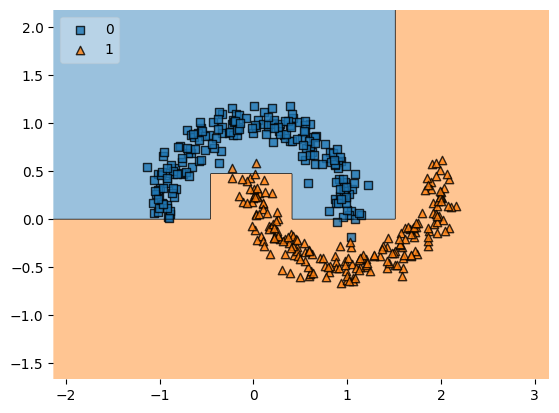

In [176]:
plot_decision_regions(X, y, voting, legend=2)

## From here Working on MNIST Dataset

In [26]:
from keras.datasets import mnist

2024-06-24 13:37:01.677250: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 13:37:01.677309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 13:37:01.679141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 13:37:01.687059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 13:37:02.877330: W tensorflow/compiler/tf2

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [29]:
df = pd.DataFrame(X_train)
df['target'] = y_train

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [31]:
# implement pca and select only 2 features 
# plot them and get boundary
from sklearn.svm import SVC

In [146]:
models_ = [
    ("lor", LogisticRegression(multi_class='multinomial')),
    ("decision tree", DecisionTreeClassifier(max_depth=5)),
]

In [58]:
from sklearn.ensemble import VotingClassifier
voting_ = VotingClassifier(estimators=models_, voting='soft')

In [59]:
from sklearn.decomposition import PCA
# optimal best pca -> 20, degree 3
pca_pipe = Pipeline([
    ("pca", PCA(n_components=2))
])

model_pipe = Pipeline([
    ("polynomial feature", PolynomialFeatures(degree=1)),
    ("multinomial voting model", voting_)
])

In [60]:
for model in models_:
    X_train_encoded = pca_pipe.fit_transform(X_train)
    X_test_encoded = pca_pipe.transform(X_test)
    model[1].fit(X_train_encoded, y_train)
    y_pred = model[1].predict(X_test_encoded)
    print(f"{model[0]} : ", accuracy_score(y_test, y_pred))

/home/prafull/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lor :  0.4445
decision tree :  0.4308


In [61]:
mnist_pipe = Pipeline([
    ("PCA pipe", pca_pipe),
    ("Model", model_pipe)
])

In [62]:
mnist_pipe.fit(X_train, y_train)

/home/prafull/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('PCA pipe', Pipeline(steps=[('pca', PCA(n_components=2))])),
                ('Model',
                 Pipeline(steps=[('polynomial feature',
                                  PolynomialFeatures(degree=1)),
                                 ('multinomial voting model',
                                  VotingClassifier(estimators=[('lor',
                                                                LogisticRegression(multi_class='multinomial')),
                                                               ('decision tree',
                                                                DecisionTreeClassifier(max_depth=5))],
                                                   voting='soft'))]))])

In [63]:
y_pred = mnist_pipe.predict(X_train)
accuracy_score(y_train, y_pred)

0.4426833333333333

In [64]:
y_pred_ = mnist_pipe.predict(X_test)
accuracy_score(y_test, y_pred_)

0.4535

In [65]:
from sklearn.metrics import recall_score, precision_score
print("recall train",recall_score(y_train, y_pred, average='macro'))
print("precision train",precision_score(y_train, y_pred, average='macro'))


print("recall test",recall_score(y_test, y_pred_, average='macro'))
print("precision test",precision_score(y_test, y_pred_, average='macro'))

recall train 0.4310293157510112
precision train 0.38438284040892534
recall test 0.4436512393439497
precision test 0.38491429377116665


/home/prafull/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prafull/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print("f1_score train", f1_score(y_train, y_pred, average='macro'))
print("f1_score test",f1_score(y_test, y_pred_, average='macro'))

f1_score train 0.38749443022239444
f1_score test 0.39364066499083916


## Visualization purpose -> need to train model on only 2 pca component

In [67]:
res = pca_pipe.transform(X_test[0:100])
x0 = res[:,0]
x1 = res[:,1]

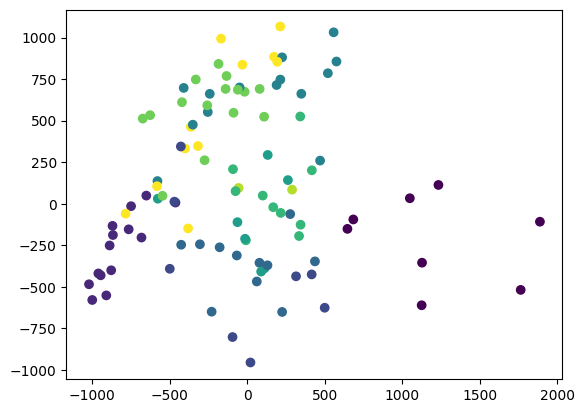

In [68]:
plt.scatter(x=x0, y=x1, c=y_test[0:100])

/home/prafull/.local/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

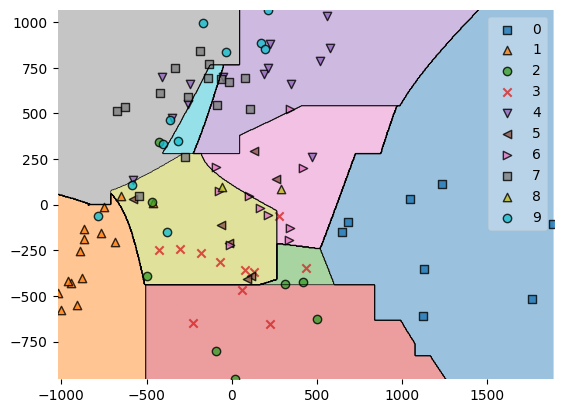

In [69]:
# pca -> 2 component, degree -> 2, accuract -> tr : 0.39 te: 40
plot_decision_regions(res, y_test[:100], model_pipe)